importing the necessary dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

data collection and preprocessing


In [3]:
insurance_df=pd.read_csv('/content/medical_insurance.csv')


inspecting the first 5 rows

In [4]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


getting the rows and columns count

In [5]:
insurance_df.shape

(2772, 7)

checking the null values in the dataset

In [6]:
insurance_df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


checking some information about the dataset

In [7]:
insurance_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


getting the statistical measure

In [8]:
insurance_df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


distribution of age value

<ipython-input-10-7b58d5d33fdb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_df['age'])


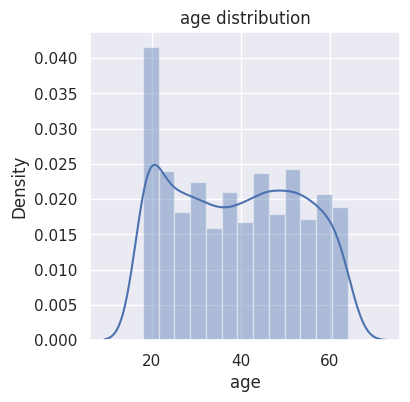

In [10]:
sns.set()
plt.figure(figsize=(4,4))
sns.distplot(insurance_df['age'])
plt.title('age distribution')
plt.show()

gender columns

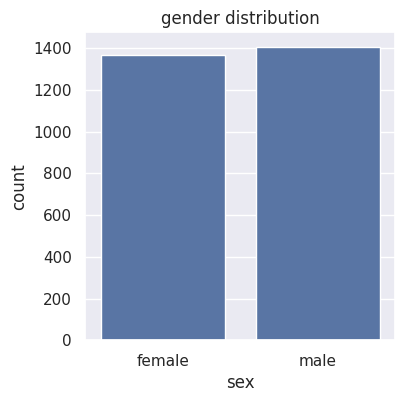

In [12]:
plt.figure(figsize=(4,4))
sns.countplot(x='sex',data=insurance_df)
plt.title('gender distribution')
plt.show()

In [13]:
insurance_df['sex'].value_counts()

,count
sex,
male,1406
female,1366


bmi distribution

<ipython-input-14-c1570e99197c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_df['bmi'])


Text(0.5, 1.0, 'bmi distribution')

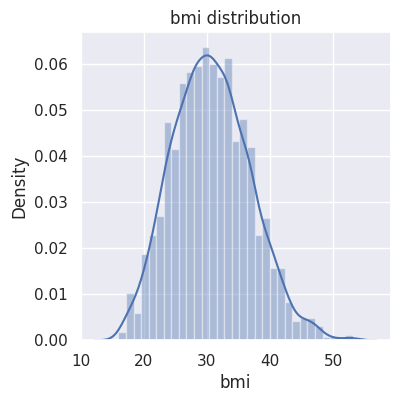

In [14]:
plt.figure(figsize=(4,4))
sns.distplot(insurance_df['bmi'])
plt.title('bmi distribution')

children columns

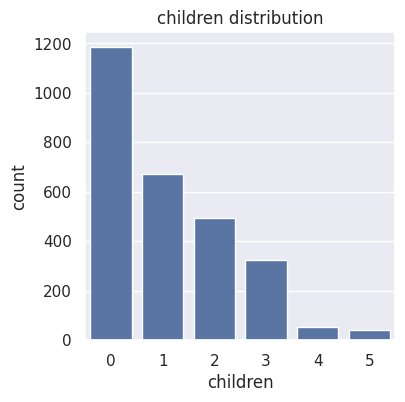

In [15]:
plt.figure(figsize=(4,4))
sns.countplot(x='children',data=insurance_df)
plt.title('children distribution')
plt.show()

In [16]:
insurance_df['children'].value_counts()

,count
children,
0,1186
1,672
2,496
3,324
4,52
5,42


smoker columns

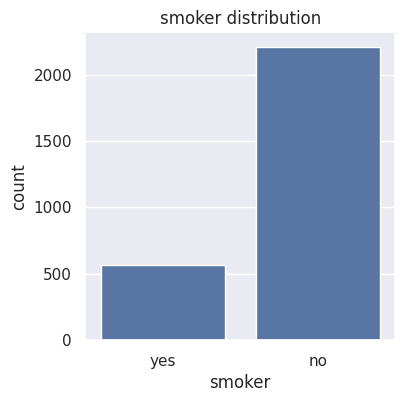

In [17]:
plt.figure(figsize=(4,4))
sns.countplot(x='smoker',data=insurance_df)
plt.title('smoker distribution')
plt.show()

region column

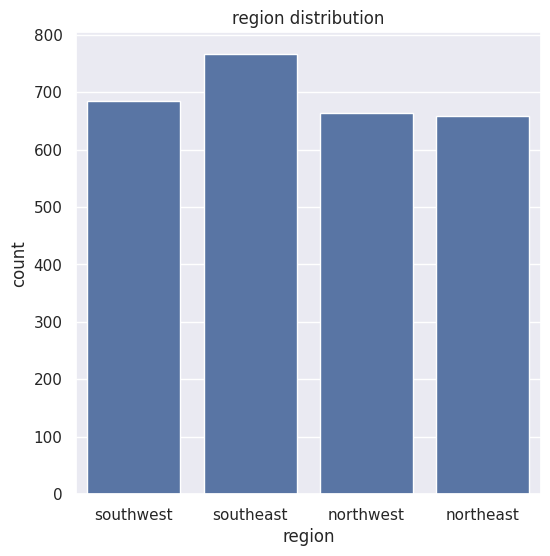

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_df)
plt.title('region distribution')
plt.show()

charge distribution

<ipython-input-20-b8518bc96d62>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_df['charges'])


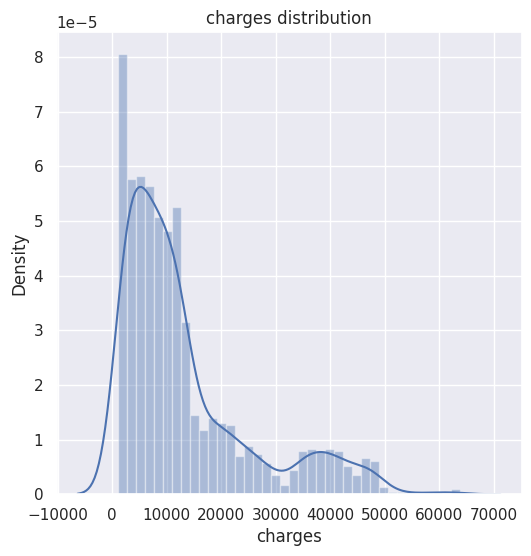

In [20]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_df['charges'])
plt.title('charges distribution')
plt.show()

encoding categorical data

In [21]:
insurance_df.replace({'sex':{'male':0,'female':1},'smoker':{'yes':1,'no':0},'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)


<ipython-input-21-e5088b7125cc>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_df.replace({'sex':{'male':0,'female':1},'smoker':{'yes':1,'no':0},'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)


 splitting the features and target


In [23]:
x,y=insurance_df.drop(columns='charges',axis=1),insurance_df['charges']
print(x)
print(y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
2767   47    1  45.320         1       0       0
2768   21    1  34.600         0       0       1
2769   19    0  26.030         1       1       3
2770   23    0  18.715         0       0       3
2771   54    0  31.600         0       0       1

[2772 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
2767     8569.86180
2768     2020.17700
2769    16450.89470
2770    21595.38229
2771     9850.43200
Name: charges, Length: 2772, dtype: float64


**splitting the training and testing data**

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [25]:
print(x_train.shape,x_test.shape,x.shape)

(2217, 6) (555, 6) (2772, 6)


**model training**

In [26]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

**model evaluation**

In [27]:
taining_data_prediction=model.predict(x_train)

#r square value
r2_train=metrics.r2_score(y_train,taining_data_prediction)
print('r square value:',r2_train)

r square value: 0.7561940076387631


In [28]:
testing_data_prediction=model.predict(x_test)

#r square value
r2_test=metrics.r2_score(y_test,testing_data_prediction)
print('r square value:',r2_test)

r square value: 0.7272408044903713


In [34]:
input_data=x_test.iloc[0,:]
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(f'prediction medical insurance cost is {prediction[0]}')


prediction medical insurance cost is 39922.60384081243


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
